In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(1) #ensure reproducibility

pd.options.mode.chained_assignment = None 

In [2]:
import dame_flame
import random

## Data Cleaning (CREATING flame_enrollment.csv)

In [ ]:
# We start with a dataset that has registry data merged with unequal commute features data (LIFT_registry_UCMerged)

In [4]:
# Before rebinning UC covariates
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged.csv")
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial Load,Study Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D
0,0,36,Black or African American,Other,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,568-1,4,3,1,1,2
1,1,31,White,English,12/31/2018,2017-05-04,Promo Account,530330288022,NaN,NaN,7672-1,4,3,1,1,2
2,2,33,White,English,3/31/2021,2019-04-08,WithinReach,530330288022,NaN,NaN,7672-2,4,3,1,1,2
3,3,33,White,English,8/31/2019,2017-06-27,KCMCCS,530330288022,NaN,NaN,7776-1,4,3,1,1,2
4,4,27,Black or African American,English,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,18544-1,4,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2


In [63]:
# After rebinning UC covariates
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged_new.csv")
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial Load,Study Card,...,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,3,3,2,8,8,9,9,5
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93655,93655,36,Asian,English,2/28/2021,2018-05-15,King County Public Health,530330322122,NaN,NaN,...,0,0,0,0,0,1,0,1,1,2
93656,93656,36,Other,English,2/28/2021,2018-05-15,King County Public Health,530330322122,NaN,NaN,...,0,0,0,0,0,1,0,1,1,2
93657,93657,26,Multi-Racial,English,7/31/2020,2018-06-11,CCS BA3628,530330322122,Monthly Pass,NaN,...,0,0,0,0,0,1,0,1,1,2
93658,93658,58,White,English,3/31/2020,2018-06-13,King County Public Health,530530724083,NaN,NaN,...,1,0,0,1,1,3,1,1,2,2


In [64]:
LIFT_reg.columns = [c.replace(' ', '_') for c in LIFT_reg.columns]

In [65]:
# type(LIFT_reg.DateIssued[1])
LIFT_reg['DateIssued'] = pd.to_datetime(LIFT_reg['DateIssued'])
# LIFT_reg['Expiration'] = pd.to_datetime(LIFT_reg['Expiration'])

In [66]:
sap = LIFT_reg[(LIFT_reg.DateIssued >= "2020-10-01")]

In [67]:
sap["SAP"] = np.where(sap["Initial_Load"] == "Subsidized Annual Pass", 1, 0)
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,3,2,8,8,9,9,5,0
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,0,0,5,0,1,0,0,0
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,2,0,0,3,0,7,0,1,8,0
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,0,0,1,0,0,1,2,4,0
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,0,0,1,0,1,1,2,3,0


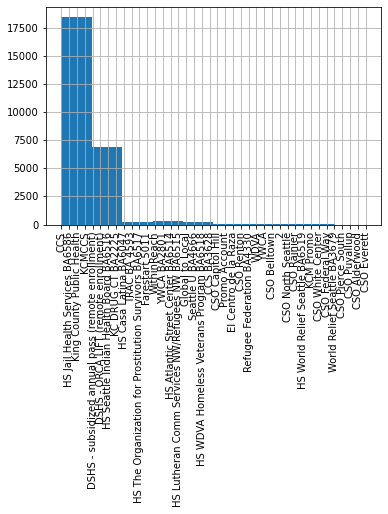

In [68]:
sap["CardIssuingAgency"].hist()
plt.xticks(rotation=90)
plt.show()

In [69]:
top5 = sap.value_counts("CardIssuingAgency").index[:5]
top5.tolist()

['King County Public Health',
 'DSHS - ORCA LIFT (remote enrollment)',
 'DSHS - subsidized annual pass (remote enrollment)',
 'CCS',
 'KCMCCS']

In [70]:
# Condense CardIssuingAgency to the top 5 agencies and and "other" category
sap['Agency'] = (sap.CardIssuingAgency.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,CCS
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,CCS
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,2,8,8,9,9,5,0,Other
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,King County Public Health
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,2,8,8,9,9,5,1,CCS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,0,5,0,1,0,0,0,King County Public Health
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,0,0,3,0,7,0,1,8,0,KCMCCS
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,0,1,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment)
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,0,1,0,1,1,2,3,0,CCS


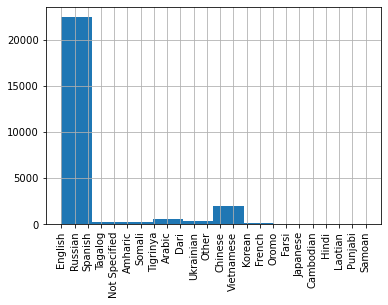

In [71]:
sap["LanguageSpoken"].hist()
plt.xticks(rotation=90)
plt.show()

In [72]:
sap["LanguageSpoken"].value_counts()

English          20754
Chinese           1631
Spanish           1499
Dari               402
Other              353
Vietnamese         310
Amharic            184
Not Specified      177
Russian            164
Tigrinya           124
Somali              73
Farsi               65
Korean              57
Ukrainian           52
French              46
Arabic              46
Tagalog             37
Oromo               13
Punjabi             12
Cambodian           12
Japanese             6
Hindi                5
Samoan               3
Laotian              3
Name: LanguageSpoken, dtype: int64

In [73]:
top5 = sap.value_counts("LanguageSpoken").index[:5]
top5.tolist()

['English', 'Chinese', 'Spanish', 'Dari', 'Other']

In [74]:
# Language is the condensed version of LanguageSpoken.
sap['Language'] = (sap.LanguageSpoken.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,CCS,English
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,CCS,English
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,2,8,8,9,9,5,0,Other,English
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,King County Public Health,English
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,2,8,8,9,9,5,1,CCS,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,5,0,1,0,0,0,King County Public Health,English
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,0,3,0,7,0,1,8,0,KCMCCS,English
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,1,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,1,0,1,1,2,3,0,CCS,English


In [75]:
# split into user id and card number
sap[['user_id', 'stage']] = sap['card_id'].str.split('-', expand=True)

In [76]:
# bin age.
sap['Age_bin']=pd.cut(x = sap['Age'],
                        bins = [0,25,35,45,55,65,200], 
                        labels = [0,1,2,3,4,5])

# sap.drop(columns=['RaceDesc','LanguageSpoken', 'CardIssuingAgency'],inplace=True)

In [77]:
sap = sap.loc[:, ~sap.columns.isin(['Initial_Load', 'Study_Card', 'card_id','DateIssued','GEOID','Unnamed:_0','Expiration','LanguageSpoken','Age','CardIssuingAgency'])]
sap

,RaceDesc,FIPS,duplicate,stage,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin
0,Asian,530330092002,False,8,61080,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,61080,2
1,Black or African American,530330092002,False,6,107444,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,107444,3
2,Black or African American,530330092002,False,6,57528,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,0,Other,English,57528,2
3,Black or African American,530330092002,False,5,10168,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,King County Public Health,English,10168,4
4,Hispanic or Latino,530330092002,False,5,172698,2.245899,708,1.487184,0.721379,Seattle,...,8,8,9,9,5,1,CCS,English,172698,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,530330220034,False,1,237038,1.456875,174,0.017855,0.000024,Seattle,...,5,0,1,0,0,0,King County Public Health,English,237038,0
93563,White,530610526071,False,1,237256,0.472162,493,0.001867,0.001867,Seattle,...,0,7,0,1,8,0,KCMCCS,English,237256,2
93572,White,530530730053,False,1,236550,0.229570,231,0.004476,0.004476,Seattle,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4
93598,White,530330321021,False,1,39120,0.400939,239,0.005537,0.005537,Seattle,...,0,1,1,2,3,0,CCS,English,39120,3


In [78]:
sap["SAP"].value_counts()

0    17900
1     8173
Name: SAP, dtype: int64

In [49]:
print(8173/17900)

0.4565921787709497


In [93]:
# Create the feature 'count_enroll' to count the number of enrollments per user_id.

sap["stage"] = sap["stage"].astype(int)
sap['count_enroll'] = sap['stage']
sap['count_enroll']
#count_enroll = sap.groupby(["user_id"]).count()[['stage']]
#count_enroll = count_enroll.rename(columns={'stage': 'count_enroll'})

0        8
1        6
2        6
3        5
4        5
        ..
93559    1
93563    1
93572    1
93598    1
93639    1
Name: count_enroll, Length: 26073, dtype: int64

In [91]:
# sap.groupby(["user_id"]).head()
print(len(sap["user_id"]))
print(len(sap["user_id"].unique()))

26073
26073


In [92]:
count_enroll.value_counts() # why does it show that everyone enrolled 1x?

count_enroll
1               26073
dtype: int64

In [94]:
# sap = sap.merge(count_enroll, on='user_id', how='left') # 117728 rows
sap_enrollment = sap
sap_enrollment = sap.loc[:, ~sap.columns.isin(['stage'])]
sap_enrollment

,RaceDesc,FIPS,duplicate,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,530330092002,False,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,530330092002,False,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,530330092002,False,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,530330092002,False,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,530330092002,False,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,530330220034,False,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,530610526071,False,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,530530730053,False,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,530330321021,False,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,...,1,1,2,3,0,CCS,English,39120,3,1


In [95]:
sap_enrollment['count_enroll'] = sap_enrollment['count_enroll'].astype(int)

In [97]:
ds_general = sap_enrollment.loc[:, ~sap_enrollment.columns.isin(['FIPS','Age','DateIssued','Expiration', 'duplicate'])]
ds_general

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,1,1,2,3,0,CCS,English,39120,3,1


In [103]:
ds_general = ds_general.drop_duplicates()
ds_general # 27320 rows × 12 columns [27320 unique user_id's]

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,1,1,2,3,0,CCS,English,39120,3,1


In [107]:
ds_general.isnull().sum() 

RaceDesc                              0
id                                    0
OverallJobAccess                      0
lowwagelaborforce                     0
Access30Transit                       0
Access30Transit_ts                    0
MSA                                   0
spatialmismatch                       0
OverallJobAccess_quantileNum_4q       0
lowwagelaborforce_quantileNum_4q      0
Access30Transit_quantileNum_4q        0
Access30Transit_ts_quantileNum_4q     0
spatialmismatch_quantileNum_4q        0
OverallJobAccess_quantileNum_10q      0
lowwagelaborforce_quantileNum_10q     0
Access30Transit_quantileNum_10q       0
Access30Transit_ts_quantileNum_10q    0
spatialmismatch_quantileNum_10q       0
SAP                                   0
Agency                                0
Language                              0
user_id                               0
Age_bin                               0
count_enroll                          0
dtype: int64

### Dropping the few rows with na values before running FLAME

In [105]:
# 1 value in Age_bin was NA.
ds_general = ds_general[ds_general['Age_bin'].notna()]
ds_general

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,1,1,2,3,0,CCS,English,39120,3,1


In [106]:
# Fill in the NA race values, labeling as "Other"
ds_general["RaceDesc"] = ds_general["RaceDesc"].fillna(value="Other")
ds_general

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,user_id,Age_bin,count_enroll
0,Asian,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,61080,2,8
1,Black or African American,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,107444,3,6
2,Black or African American,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,0,Other,English,57528,2,6
3,Black or African American,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,King County Public Health,English,10168,4,5
4,Hispanic or Latino,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,9,9,5,1,CCS,English,172698,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,0,1,0,0,0,King County Public Health,English,237038,0,1
93563,White,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,7,0,1,8,0,KCMCCS,English,237256,2,1
93572,White,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,236550,4,1
93598,White,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,1,1,2,3,0,CCS,English,39120,3,1


# Visualizing Count Enrollment

Text(0.5, 1.0, 'Reenrollment count (individuals in SAP)')

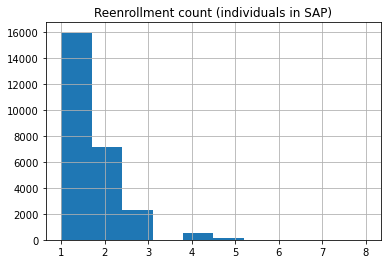

In [108]:
ds_general["count_enroll"].hist()
plt.title('Reenrollment count (individuals in SAP)')

Text(0.5, 1.0, 'Reenrollment count (individuals not in SAP)')

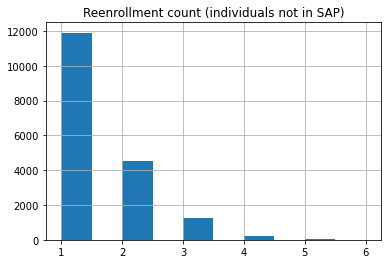

In [109]:
ds_general[(ds_general.SAP == 0)]["count_enroll"].hist()
plt.title('Reenrollment count (individuals not in SAP)')

<AxesSubplot:>

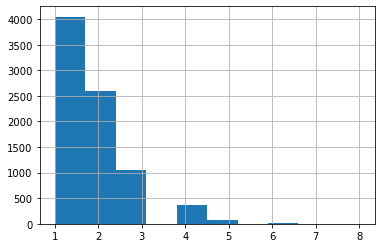

In [110]:
ds_general[(ds_general.SAP == 1)]["count_enroll"].hist()

<AxesSubplot:>

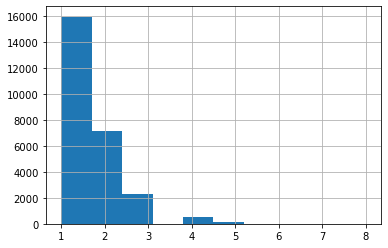

In [111]:
# loadings per week. We see outliers at 30-45
ds_general["count_enroll"].hist()

In [112]:
# Drop User_id for matching
match_all = ds_general.loc[:, ~ds_general.columns.isin(['user_id','Age'])]
match_all

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,Asian,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,English,2,8
1,Black or African American,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,English,3,6
2,Black or African American,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,0,Other,English,2,6
3,Black or African American,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,King County Public Health,English,4,5
4,Hispanic or Latino,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,English,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,5,0,1,0,0,0,King County Public Health,English,0,1
93563,White,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,0,7,0,1,8,0,KCMCCS,English,2,1
93572,White,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,1
93598,White,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,0,1,1,2,3,0,CCS,English,3,1


In [113]:
match_all.RaceDesc.value_counts()

White                                        8855
Black or African American                    5209
Asian                                        4057
Hispanic or Latino                           2656
Not Specified                                2429
Other                                        1556
American Indian or Alaska Native              647
Multi-Racial                                  349
Native Hawaiian or Other Pacific Islander     314
Name: RaceDesc, dtype: int64

## Mapping categorical variables to ordinal values for FLAME.

In [114]:
# Map all string categorical variables to numbers.
race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
match_all['RaceDesc'] = match_all['RaceDesc'].map(race)
match_all
# df_trunc['rf_phyp'] = df_trunc['rf_phyp'].map(d)

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,English,2,8
1,1,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,English,3,6
2,1,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,0,Other,English,2,6
3,1,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,King County Public Health,English,4,5
4,3,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,English,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,1,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,5,0,1,0,0,0,King County Public Health,English,0,1
93563,0,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,0,7,0,1,8,0,KCMCCS,English,2,1
93572,0,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,1
93598,0,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,0,1,1,2,3,0,CCS,English,3,1


In [115]:
language = {"English": 0, "Chinese": 1, "Spanish": 2, "Dari": 3, "Vietnamese": 4, 'Other': 5}
match_all['Language'] = match_all['Language'].map(language)
match_all

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,0,2,8
1,1,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,0,3,6
2,1,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,0,Other,0,2,6
3,1,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,King County Public Health,0,4,5
4,3,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,1,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,5,0,1,0,0,0,King County Public Health,0,0,1
93563,0,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,0,7,0,1,8,0,KCMCCS,0,2,1
93572,0,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),0,4,1
93598,0,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,0,1,1,2,3,0,CCS,0,3,1


In [116]:
a = {"King County Public Health": 0, "DSHS - ORCA LIFT (remote enrollment)": 1, "DSHS - subsidized annual pass (remote enrollment)": 2, "CCS": 3, "KCMCCS": 4, 'Other': 5}
match_all['Agency'] = match_all['Agency'].map(a)
match_all

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,3,0,2,8
1,1,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,3,0,3,6
2,1,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,0,5,0,2,6
3,1,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,0,0,4,5
4,3,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,3,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,1,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,5,0,1,0,0,0,0,0,0,1
93563,0,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,0,7,0,1,8,0,4,0,2,1
93572,0,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,0,1,2,4,0,1,0,4,1
93598,0,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,0,1,1,2,3,0,3,0,3,1


In [117]:
# match_all.to_csv('/Users/JennyH/cisil-causal-inference/Data/flame_enrollment2.csv')  

# FLAME Algorithm For Matching (Starts Here if you have flame_enrollment2.csv)

In [3]:
match_all = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/flame_enrollment2.csv")
match_all = match_all.loc[:, ~match_all.columns.isin(['Unnamed: 0'])]
match_all

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,3,0,2,8
1,1,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,3,0,3,6
2,1,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,0,5,0,2,6
3,1,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,0,0,4,5
4,3,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,3,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26067,1,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,5,0,1,0,0,0,0,0,0,1
26068,0,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,0,7,0,1,8,0,4,0,2,1
26069,0,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,0,1,2,4,0,1,0,4,1
26070,0,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,0,1,1,2,3,0,3,0,3,1


In [4]:
match_all = match_all.loc[:, ~match_all.columns.isin(['id', 'OverallJobAccess', 'lowwagelaborforce', 'Access30Transit', 'Access30Transit_ts', 'MSA', 'spatialmismatch'])]
match_all

,RaceDesc,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,3,3,3,3,2,8,8,9,9,5,1,3,0,2,8
1,1,3,3,3,3,2,8,8,9,9,5,1,3,0,3,6
2,1,3,3,3,3,2,8,8,9,9,5,0,5,0,2,6
3,1,3,3,3,3,2,8,8,9,9,5,1,0,0,4,5
4,3,3,3,3,3,2,8,8,9,9,5,1,3,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26067,1,2,0,0,0,0,5,0,1,0,0,0,0,0,0,1
26068,0,0,2,0,0,3,0,7,0,1,8,0,4,0,2,1
26069,0,0,0,0,0,1,0,0,1,2,4,0,1,0,4,1
26070,0,0,0,0,0,1,0,1,1,2,3,0,3,0,3,1


In [5]:
# Remove Decile quantiles for now.
match_all = match_all.loc[:, ~match_all.columns.isin([
    'OverallJobAccess_quantileNum_10q', 'lowwagelaborforce_quantileNum_10q', 
    'Access30Transit_quantileNum_10q', 'Access30Transit_ts_quantileNum_10q', 
    'spatialmismatch_quantileNum_10q'])]


In [6]:
# flame is faster but dame considers more covariate sets. stopping upon matching all t'ed units.
model_flame_AMT = dame_flame.matching.FLAME(repeats=False, 
                                            verbose=3, 
                                            early_stop_iterations=30, 
                                            stop_unmatched_t = True, 
                                            adaptive_weights='decisiontreeCV', 
                                            alpha=0.5, 
                                            want_pe=True)

In [7]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_AMT = model_flame_AMT.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1078
	Unmatched treated units:  5190 out of a total of  8173 treated units
	Unmatched control units:  13850 out of a total of  17899 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  7032
	Number of matches made so far:  7032
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  1274
	Unmatched treated units:  4921 out of a total of  8173 treated units
	Unmatched control units:  13508 out of a total of  17899 control units
	Predictive error of covariates chosen this iteration:  2.038028092738299
	Number of matches made in this iteration:  611
	Number of matches made so far:  7643
	In this iteration, the covariates dropped are:  OverallJobAccess_quantileNum_4q
Iteration number:  3
	Number of matched groups formed in total:  1615
	Unmatched treated units:  4075 out of a total of  8173 treated u

### Creating Figure Displaying Match Group Size vs. Covariates Matched on.

<ipython-input-9-93a5c53b78b7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=x, rotation=90)


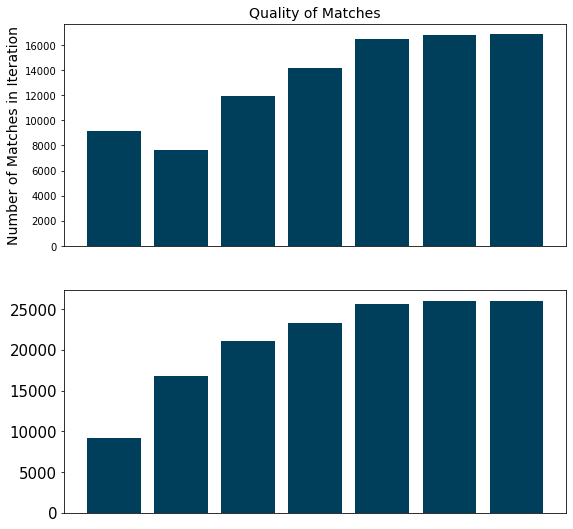

In [9]:
x = ["NONE", "AGENCY", '+AGE', '+RACE', '+Language', '+Access30Transit', '+lowwagelaborforce']
y1 = [9130, 7614, 11950, 14126, 16455, 16815, 16854] 
y2 = [9130, 16744, 21080, 23256, 25585, 25945, 25984]


f, ax = plt.subplots(ncols = 1, nrows = 2, gridspec_kw = {'width_ratios':[.51]}, figsize=(9,9))
ax[0].set_ylabel('Number of Matches in Iteration', fontsize=14)
ax[0].set_xticklabels(labels=x, rotation=90)
ax[0].set_xlabel('Covariate(s) Dropped', fontsize=14)
ax[0].set_title('Quality of Matches', fontsize=14)
ax[0].bar(x,y1, color = '#003f5c')
ax[0].axes.xaxis.set_visible(False)

# ax[1].set_ylabel('Number of Matches Made', fontsize=22)
ax[1].set_xlabel('Covariate(s) Dropped', fontsize=30)
# ax[1].set_title('Quality of Matches', fontsize=30)
ax[1].bar(x,y2, color = '#003f5c')
ax[1].tick_params(axis="y", labelsize=15)
ax[1].axes.xaxis.set_visible(False)

In [8]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT

0.21115267046953873

In [ ]:
# As we can see, the ATE is slightly positive, 
# implying that the subsidized annual pass (SAP) causes an enroller 
# to enroll more than non-SAP recipients by this many more times.

In [126]:
group1 = model_flame_AMT.units_per_group[1]
s_mmg = match_all.loc[group1]
s_mmg # each row of group 1.

,RaceDesc,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,SAP,Agency,Language,Age_bin,count_enroll
2675,0,3,1,1,1,0,1,0,0,0,2
2682,0,3,1,1,1,0,0,0,0,0,2
2683,0,3,1,1,1,0,0,0,0,0,2
9864,0,3,1,1,1,0,0,0,0,0,2
14624,0,3,1,1,1,0,0,0,0,0,1


In [127]:
s_mmg.iloc[0]["RaceDesc"] == 0 # color all group numbers of this group.


True

In [9]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    Note: the model name and dataframe are specified below 
    (make sure to change for different models and dataframe).
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_AMT.units_per_group:

        # find len of just treated units
        df_mmg = match_all.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)


In [10]:
def create_cate_lst(sizes, cates):
    '''
    helper function to create credible interval for ATE. Creates an extended list
    where each element is the CATE for a unit.'''
    
    out = []
    for i in range(len(cates)):
        for j in range(sizes[i]):
            out.append(cates[i])
    return out 

### Scatter Plot Displaying CATES of re-enrollment

In [11]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

0.20349544619248539 0.21880989474659346


Text(0, 0.5, 'CATE')

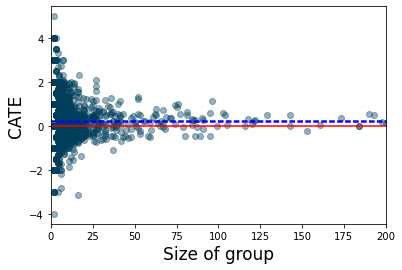

In [12]:
plt.scatter(size, cate_all, c = "#003f5c", alpha=0.4)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='b', linestyle='--')
plt.axhline(y=ub, color='b', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
# plt.title("Visualizing Enrollment CATE of matched groups by size", fontsize=14)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('ate_scatter_enrollment.pdf', bbox_inches="tight")

In [15]:
# Here are the corresponding codes for race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)


In [16]:
## Conf. Interval
## Conf. Interval for Matched groups with Asian Individuals
cate_lst = create_cate_lst(size_asian, cate_asian)

mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

0.3470227659767201 0.37386033641714034


In [24]:

q025 = np.percentile(cate_test, 2.5) # return 50th percentile, e.g median.
q975 = np.percentile(cate_test, 97.5)
print (q025, q975)

-0.25 1.25


Text(0, 0.5, 'CATE')

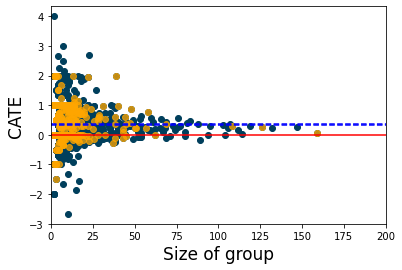

In [17]:
# Scatterplot Displaying the CATE of matched groups with Asian Individuals

cors = {True:'#bc5090', False:'#ffa600'}
asian = pd.Series(in_asian)

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_asian, cate_asian, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='blue', linestyle='--')
plt.axhline(y=ub, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('asian_enroll.pdf', bbox_inches="tight")

### Scatter for AccesstoTransit

In [15]:
# Calculate the quantiles for Lowest transit Quantile.
(size, cate_all, in_trans1, size_trans1, cate_trans1) = create_df_scatter("Access30Transit_quantileNum_4q", 0)

cate_lst = create_cate_lst(size_trans1, cate_trans1)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub)  

0.14660133630470015 0.16065981829744722 0.17471830029019428


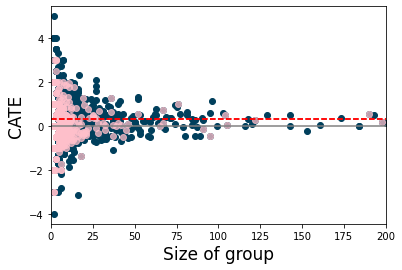

In [34]:
# Scatterplot Displaying the CATE of matched groups with transit1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_trans1, cate_trans1, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('trans1_enroll.pdf', bbox_inches="tight")

In [18]:
# Calculate the quantiles for Highest transit quantile.
(size, cate_all, in_trans3, size_trans3, cate_trans3) = create_df_scatter("Access30Transit_quantileNum_4q", 3)

cate_lst = create_cate_lst(size_trans3, cate_trans3)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub)  

0.3016070140550001 0.3152472491746564 0.3288874842943127


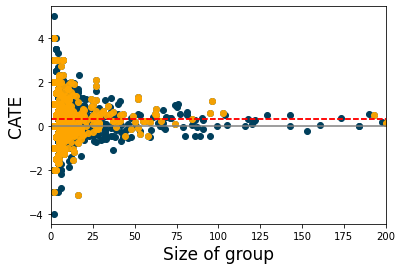

In [35]:
# Scatterplot Displaying the CATE of matched groups with transit3 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_trans3, cate_trans3, c = "#ffa600", alpha=0.95)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('trans3_enroll.pdf', bbox_inches="tight")

In [24]:
# For each unit, we can see a table displaying the covariates it was matched on.
matched = model_flame_AMT.df_units_and_covars_matched
matched[:15]

,RaceDesc,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,*,*,3,3,3,2,3,0,*
1,1,3,3,3,3,2,3,0,3
2,*,*,3,3,3,2,*,0,*
3,1,3,3,3,3,2,0,0,4
4,3,3,3,3,3,2,3,0,2
5,1,3,3,3,3,2,0,0,3
6,0,3,3,3,3,2,3,0,4
7,1,3,3,3,3,2,0,0,0
8,*,*,3,3,3,2,*,0,*
9,0,3,3,3,3,2,0,0,4


### Scatter for OverallJobAccess

In [25]:
# Calculate the quantiles for Lowest Overall Job Access Quantile.
(size, cate_all, in_Ja1, size_Ja1, cate_Ja1) = create_df_scatter("OverallJobAccess_quantileNum_4q", 0)

cate_lst = create_cate_lst(size_Ja1, cate_Ja1)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub) 

0.1407913827251626 0.15645244687767687 0.17211351103019115


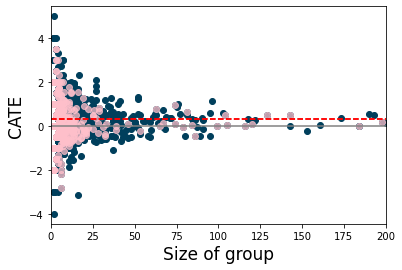

In [31]:
# Scatterplot Displaying the CATE of matched groups with Ja1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_Ja1, cate_Ja1, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('Ja1_enroll.pdf', bbox_inches="tight")

In [27]:
# Calculate the quantiles for Highest Overall Job Access Quantile.
(size, cate_all, in_Ja3, size_Ja3, cate_Ja3) = create_df_scatter("OverallJobAccess_quantileNum_4q", 3)

cate_lst = create_cate_lst(size_Ja3, cate_Ja3)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub) 

0.30582260391597244 0.3190329743177717 0.332243344719571


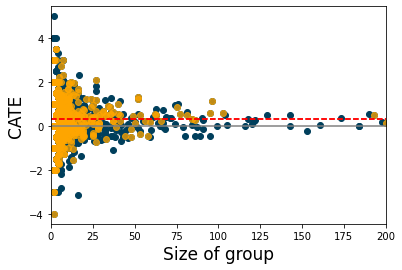

In [32]:
# Scatterplot Displaying the CATE of matched groups with Ja1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_Ja3, cate_Ja3, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('Ja3_enroll.pdf', bbox_inches="tight")

# Exact Matching

In [6]:
# Matching on all 9 covariates in the dataset.
model_flame_EX = dame_flame.matching.FLAME(repeats=False, verbose=3, early_stop_iterations=1, stop_unmatched_t = True, adaptive_weights='decisiontree', want_pe=True)


In [7]:
model_flame_EX.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_EX = model_flame_EX.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1166
	Unmatched treated units:  5187 out of a total of  9068 treated units
	Unmatched control units:  13002 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  9130
	Number of matches made so far:  9130
	In this iteration, the covariates dropped are:  set()
9130 units matched. We stopped before doing iteration number:  1


In [8]:
# ATE Overall Using Exacxt Matching.
ate_6 = dame_flame.utils.post_processing.ATE(model_flame_EX)
ate_6 # 0.304

0.3042368978425022

In [14]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    Note: the model name is specified below (make sure to change for different models).
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_EX.units_per_group:

        # find len of just treated units
        df_mmg = match_all.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_EX, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_EX, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)

In [15]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub) 

0.29334508716879304 0.3151287085162162


The ATE results from exact matching are 0.30 [0.29 0.32].